In [1]:
# Importing libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusting the configuration of the plots we will create

In [34]:
# Importing the dataset

In [35]:
df = pd.read_csv(r'C:\Users\USER\Downloads\new_folder\movies.csv')

In [36]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [37]:
# Check if there's a missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} . {}%'.format(col, pct_missing))

name . 0.0%
rating . 0.010041731872717789%
genre . 0.0%
year . 0.0%
released . 0.0002608242044861763%
score . 0.0003912363067292645%
votes . 0.0003912363067292645%
director . 0.0%
writer . 0.0003912363067292645%
star . 0.00013041210224308815%
country . 0.0003912363067292645%
budget . 0.2831246739697444%
gross . 0.02464788732394366%
company . 0.002217005738132499%
runtime . 0.0005216484089723526%


In [38]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [39]:
# Check for non-finite values
non_finite_values = df[df['budget'].notnull() & ~np.isfinite(df['budget'])]
non_finite_values = df[df['gross'].notnull() & ~np.isfinite(df['gross'])]
non_finite_values = df[df['votes'].notnull() & ~np.isfinite(df['votes'])]

# Handle non-finite values
# Replacing NaN and infinite values with 0
df['budget'].fillna(0, inplace=True)
df['budget'] = df['budget'].replace([np.inf, -np.inf], 0)

df['gross'].fillna(0, inplace=True)
df['gross'] = df['gross'].replace([np.inf, -np.inf], 0)

df['votes'].fillna(0, inplace=True)
df['votes'] = df['votes'].replace([np.inf, -np.inf], 0)

# Convert to integer
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


In [40]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [41]:
# Create correct year column

df['Correct_Year'] = df['released'].astype(str).str[:12]

In [42]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 198"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 198"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 198"


In [43]:
df = df.sort_values(by=['gross'],inplace=False, ascending=False)

In [44]:
pd.set_option('display.max_rows', None)

In [45]:
# Dropping duplicates

df['company'].drop_duplicates().sort_values(ascending= False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [46]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18,"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 20"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19,"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18,"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 20"


In [47]:
# Company high corelation
#Budget high correlation

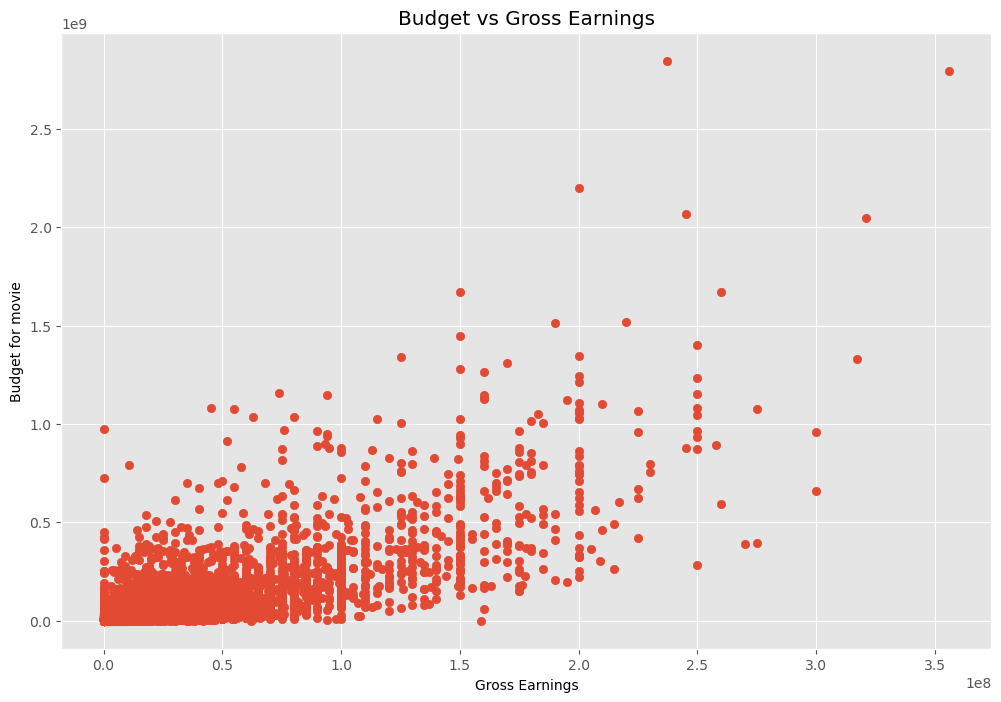

In [48]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for movie')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

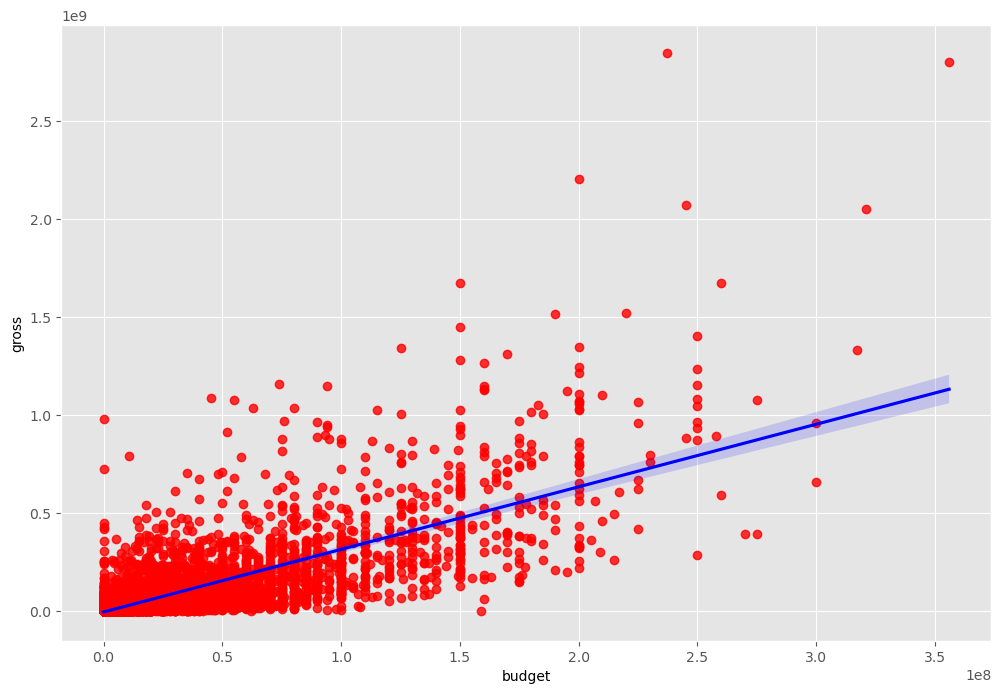

In [49]:
# Plot the Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [50]:
# Data Correlation

df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_12104\1626805460.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


<p>This correlation above(df.corr) only works on numerical fields </br> Note: High correlation between Budget and Gross</p>

C:\Users\USER\AppData\Local\Temp\ipykernel_12104\1229295883.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


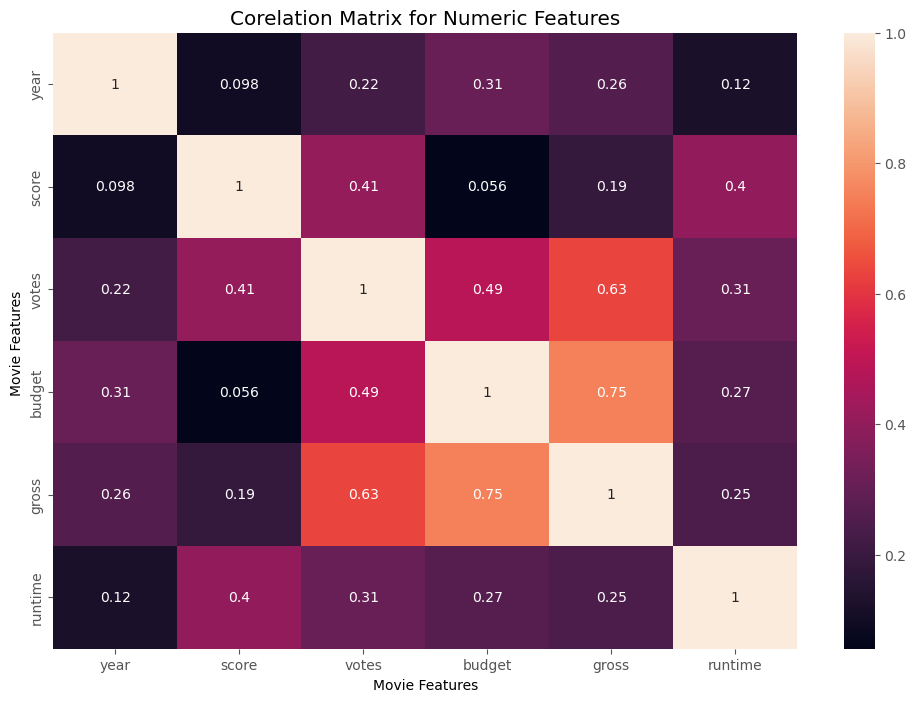

In [51]:
# Data Correlation Matrix

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Corelation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features ')

plt.show()

In [52]:
# Analysing the company column

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_Year
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,164
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,54
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,165
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,164
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,56


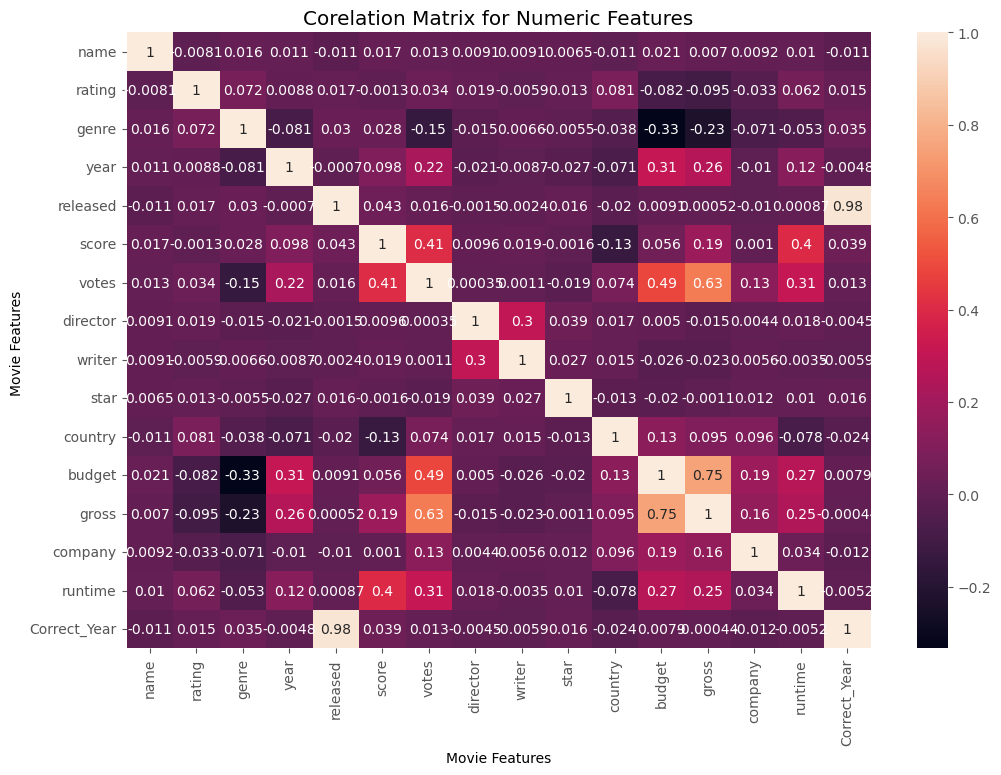

In [53]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Corelation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features ')

plt.show()

In [54]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_Year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.010987
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.015158
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,0.035163
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,-0.004797
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,0.978916
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.038949
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.309122,0.013362
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.004510
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.005900
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,0.016474


In [55]:
correlation_mat = df_numerized.corr()

cprr_pairs = correlation_mat.unstack()

cprr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [56]:
sorted_pairs = cprr_pairs.sort_values()

sorted_pairs.head()

budget  genre    -0.334021
genre   budget   -0.334021
        gross    -0.234297
gross   genre    -0.234297
genre   votes    -0.145296
dtype: float64

In [57]:
high_corr =sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.632870
votes         gross           0.632870
gross         budget          0.750157
budget        gross           0.750157
released      Correct_Year    0.978916
Correct_Year  released        0.978916
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Correct_Year  Correct_Year    1.000000
dtype: float64

<p>Votes and budget has the highest correlation to gross earnings </br> Company has low correlation.</p>